<a href="https://colab.research.google.com/github/marcosw1998/Data-Science/blob/main-mlflow/Project_ee2/projeto2_predict_covid_spends_PE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos custos do governo de Pernambuco - BR em relação à Covid-19**
* Projeto corresponde a entrega parcial para avaliação na cadeira eletiva IF697 - Intro. a Ciência dos Dados
* Autores: Igor Silva e Marcos Cavalcanti
* Conjunto de dados públicos retirados das seguintes fontes:
  * [Portal da Transparência TCU](http://www.portaltransparencia.gov.br/coronavirus)
  * [Prefeitura do Recife](http://dados.recife.pe.gov.br/dataset?tags=sa%C3%BAde)
  * [Brasil.io](https://brasil.io/dataset/covid19/caso_full/)



## **Por quê o tema?**

* Interesse em entender e expor de forma clara os gastos públicos
* Analisar distribuição de gastos
* Covis-19 é um tema importante e merece muita atenção, pois tem feito muitas vítimas e mudado a forma como a sociedade pensa e se organiza
* Entender a distribuição de gastos é uma boa forma de tentar corrigir erros e minimizar danos futuros na economia e na sociedade

## **Carregando as bibliotecas**

  * Utilizaremos as seguintes bibliotecas
    * **`Pandas`** para trabalhar sobre os dados  e a biblioteca. 
    * **`Numpy`** para operações sobre os datasets.
    * **`matplotlib`** e **`seaborn`** para visualizações.
    * **`Optuna`** para Seleção otimizada de hiperparâmetros dos algoritmos de ML que serão utilizados.
    * **`MLflow`** para rastrear os resultados e métricas dos algoritmos de ML, além de usá-lo como fundamentação para otimizá-los, posteriormente.
  



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [2]:
pip install optuna

     |████████████████████████████████| 296kB 9.6MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
     |████████████████████████████████| 163kB 14.6MB/s 
     |████████████████████████████████| 143kB 16.4MB/s 
     |████████████████████████████████| 112kB 11.1MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=f5a442ca2cfbe73dcda2a251723103f9aa357d9107bb7a4e6aba9ddb9030432c
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [3]:
!pip install mlflow

     |████████████████████████████████| 14.2MB 275kB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 378kB 47.7MB/s 
     |████████████████████████████████| 1.1MB 45.8MB/s 
     |████████████████████████████████| 153kB 49.3MB/s 
     |████████████████████████████████| 163kB 42.5MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.14.3-cp37-none-any.whl size=100557 sha256=b0e1ada3b0670c28c07a6c4320372d62c8cd7d5d2f49131512172cc61e4e3e92
  Stored in directory: /root/.cache/pip/wheels/5b/24/f3/34d8e3964dac4ba849d844273c49a679111b00d5799ebb934a
  Created wheel for prometheus-flask-exporter: filename=prometheus_flask_exporter-0.18.1-cp37-none-any.whl size=17159 sha256=59c1fed89267acc75482e329d1ce4ee4a8afe6a2d06fa9578298c8d1c190f138
  Stored in directory: /root/.cache/pip/wheels/b4/1f/b8/66bd9bc3a9d6c6987ff6c4dfeb6f1fe97b5a

## **Carregando os Datasets**

### Portal da transparência

* O portal da transparência permite que sejam baixados apenas 1000 registros por vez, portanto decidimos por baixar 2 datasets diferentes e depois fazermos a junção. Os dados são referentes a algumas cidades de Pernambuco 
(Recife, Jaboatão, Olinda, Paulista, Caruaru, Garanhuns, Petrolina, Arcoverde, Serra Talhada, Buíque)

In [4]:
invest_covidPe = pd.read_csv("https://raw.githubusercontent.com/marcosw1998/Data-Science/main-mwac/Datasets/covid-pe.csv",encoding = "utf-8")
invest_covidPe2 = pd.read_csv("https://raw.githubusercontent.com/marcosw1998/Data-Science/main-mwac/Datasets/transferencias_coronavirus.csv",encoding = "utf-8")

In [5]:
#Validando os dados do dataset invest_covidPe
print('Dataset 1',invest_covidPe.shape)
invest_covidPe.sort_values("Município").head()

Dataset 1 (561, 12)


,Mês/Ano,Tipo,Tipo de Favorecido,UF,Nome do Favorecido,CPF/CNPJ,Município,Função,Programa Orçamentário,Ação Orçamentária,Linguagem Cidadã,Valor Transferido
182,nov/20,Legais. Voluntárias e Específicas,Fundo Público,PE,FUNDO MUNICIPAL DE SAUDE,11.371.082/0001-05,CARUARU,Saúde,ATENCAO ESPECIALIZADA A SAUDE,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,Sem informação,486.515.00
178,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,ASSOCICAO DE PAIS E MESTRES,11.252.224/0001-07,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,PDDE,7.897.02
179,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CONSELHO ESCOLAR MARIA DO SOCORRO DE FREITAS,02.021.769/0001-11,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,PDDE,2.837.48
87,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CONSELHO ESCOLAR DOM BERNARDINO MARCHIO,34.179.420/0001-07,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,PDDE,8.427.56
181,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,UNIDADE EXECUTORA MAJOR DR.SINVAL,11.441.171/0001-72,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,PDDE,2.274.59


In [6]:
#Validando os dados do dataset invest_covidPe2
print('Dataset 2',invest_covidPe2.shape)
invest_covidPe2.sort_values("Município").head()

Dataset 2 (140, 10)


,Mês/Ano,Tipo,Ação Orçamentária,Programa Orçamentário,Função,Tipo de Favorecido,UF,Município,Valor Transferido,Unnamed: 9
98,12/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 134.639.00,NaN
41,05/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,PROTECAO SOCIAL NO AMBITO DO SISTEMA UNICO DE ...,08 - Assistência social,Fundo Público,PE,ARCOVERDE,R$ 470.809.62,NaN
42,11/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 355.594.00,NaN
32,04/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 761.895.71,NaN
56,08/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,PROTECAO SOCIAL NO AMBITO DO SISTEMA UNICO DE ...,08 - Assistência social,Fundo Público,PE,ARCOVERDE,R$ 218.971.54,NaN


*Podemos perceber que o Dataset **invest_covidPe** possui mais colunas que o Dataset **invest_covidPe2**.  Também notamos que o Dataset invest_covidPe2 possui uma coluna com dados Nan, vamos tratar disso no pré processamento antes de fazer a concatenação dos dois Datasets*

### Dados de casos de Covid-19 por todo o estado de Pernambuco. 
Os valores estão atualizados até o dia 17/03/2021 e foram buscados através do Brasil.io

In [7]:
covidPeCases = pd.read_csv("https://raw.githubusercontent.com/marcosw1998/Data-Science/main-mwac/Datasets/covid19-1703-casos.csv",encoding = "utf-8")
print(covidPeCases.shape)
covidPeCases.sort_values("city").head()

(187, 16)


,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population,is_last,is_repeated
1,202111,2021-03-15,341,PE,Abreu e Lima,2600054.0,city,1700,1694.13828,8,159,1,0.0935,100346.0,True,False
2,202111,2021-03-15,321,PE,Afogados da Ingazeira,2600104.0,city,2478,6624.95990,1,35,0,0.0141,37404.0,True,False
3,202111,2021-03-15,321,PE,Afrânio,2600203.0,city,578,2917.71832,0,9,0,0.0156,19810.0,True,False
4,202111,2021-03-15,326,PE,Agrestina,2600302.0,city,865,3451.02733,2,36,0,0.0416,25065.0,True,False
7,202111,2021-03-15,331,PE,Alagoinha,2600609.0,city,443,3009.91983,0,13,0,0.0293,14718.0,True,False


## **Pré Processamento**
  * Junção de datasets em Dataframe Pandas
  * Tratamento de dados ```NaN```/```null``` ou corrompidos
  * Conversão de tipos
  * Transformação e identificação de dados categóricos
  * Remoção de ***Outliers*** Multivariado

### **Tratamento dos dados de Gastos Públicos**

> Remoção colunas que não fazem parte do dataset invest_covidPe2 e que não influem sobre os nossos estudos (Nome do favorecido, CPF/CNPJ, Linguagem Cidadã)

>```invest_covidPe = invest_covidPe.dropna(axis=1, how='all')```

In [8]:
cols = [4,5,10]
invest_covidPe.drop(invest_covidPe.columns[cols],axis=1,inplace=True)
invest_covidPe.sort_values("Município").head()

,Mês/Ano,Tipo,Tipo de Favorecido,UF,Município,Função,Programa Orçamentário,Ação Orçamentária,Valor Transferido
182,nov/20,Legais. Voluntárias e Específicas,Fundo Público,PE,CARUARU,Saúde,ATENCAO ESPECIALIZADA A SAUDE,ENFRENTAMENTO DA EMERGENCIA DE SAUDE PUBLICA D...,486.515.00
178,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,7.897.02
179,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,2.837.48
87,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,8.427.56
181,nov/20,Legais. Voluntárias e Específicas,Entidades Sem Fins Lucrativos,PE,CARUARU,Educação,EDUCACAO BASICA DE QUALIDADE,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,2.274.59


> Remoção coluna que tem todos os valores Nan

In [9]:
invest_covidPe2.dropna(axis=1, how='all',inplace=True)
invest_covidPe2.sort_values("Município").head()

,Mês/Ano,Tipo,Ação Orçamentária,Programa Orçamentário,Função,Tipo de Favorecido,UF,Município,Valor Transferido
98,12/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 134.639.00
41,05/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,PROTECAO SOCIAL NO AMBITO DO SISTEMA UNICO DE ...,08 - Assistência social,Fundo Público,PE,ARCOVERDE,R$ 470.809.62
42,11/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 355.594.00
32,04/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,ATENCAO ESPECIALIZADA A SAUDE,10 - Saúde,Fundo Público,PE,ARCOVERDE,R$ 761.895.71
56,08/2020,Legais. Voluntárias e Específicas,21C0 - ENFRENTAMENTO DA EMERGENCIA DE SAUDE PU...,PROTECAO SOCIAL NO AMBITO DO SISTEMA UNICO DE ...,08 - Assistência social,Fundo Público,PE,ARCOVERDE,R$ 218.971.54


> Retirando prefixo numérico e caracteres especiais dos valores da categoria 'Função'

In [10]:
invest_covidPe_funcao = invest_covidPe2['Função'].map(lambda words: str(words[5:]))
invest_covidPe2['Função'].update(invest_covidPe_funcao)
invest_covidPe2['Função'].unique()

array(['Educação', 'Saúde', 'Assistência social', 'Ciência e Tecnologia'],
      dtype=object)

> Confirmando que as colunas foram removidas e agora os 2 datasets possuem a mesma quantidade de colunas

In [11]:
print('Dataset 1',invest_covidPe.shape)
print('Dataset 2',invest_covidPe2.shape)

Dataset 1 (561, 9)
Dataset 2 (140, 9)


> Fazendo a concatenação dos Dataframes, o resultado final de linhas é igual ao somatório de linhas entre ambos os Datasets

In [12]:
invest_covidPe = invest_covidPe.append(invest_covidPe2, ignore_index=True)

> Filtragem de gastos com a saúde e retirada das colunas **Tipo**, **UF**, **Programa Orçamentário** e **Função** por não conterem dados variados.

In [13]:
len(invest_covidPe2['Tipo de Favorecido'].unique())

3

In [14]:
# Drop colunas com valores unitários

invest_covidPe.drop({'Tipo',\
                     'UF',\
                     'Ação Orçamentária'},\
                    axis=1,\
                    inplace=True \
                    )
invest_covidPe

,Mês/Ano,Tipo de Favorecido,Município,Função,Programa Orçamentário,Valor Transferido
0,mar/20,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,60.000.00
1,abr/20,Fundo Público,GARANHUNS,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1.174.944.27
2,abr/20,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,4.130.446.89
3,abr/20,Fundo Público,OLINDA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3.830.136.03
4,abr/20,Fundo Público,CARUARU,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3.662.675.00
...,...,...,...,...,...,...
696,04/2020,Fundo Público,JABOATÃO DOS GUARARAPES,Saúde,ATENCAO ESPECIALIZADA A SAUDE,R$ 7.327.021.87
697,10/2020,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,R$ 3.500.000.00
698,07/2020,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,R$ 8.676.053.00
699,07/2020,Fundo Público,BUÍQUE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,R$ 1.850.000.00


Renomeando colunas

In [15]:
invest_covidPe

,Mês/Ano,Tipo de Favorecido,Município,Função,Programa Orçamentário,Valor Transferido
0,mar/20,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,60.000.00
1,abr/20,Fundo Público,GARANHUNS,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1.174.944.27
2,abr/20,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,4.130.446.89
3,abr/20,Fundo Público,OLINDA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3.830.136.03
4,abr/20,Fundo Público,CARUARU,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3.662.675.00
...,...,...,...,...,...,...
696,04/2020,Fundo Público,JABOATÃO DOS GUARARAPES,Saúde,ATENCAO ESPECIALIZADA A SAUDE,R$ 7.327.021.87
697,10/2020,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,R$ 3.500.000.00
698,07/2020,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,R$ 8.676.053.00
699,07/2020,Fundo Público,BUÍQUE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,R$ 1.850.000.00


In [16]:
invest_covidPe = invest_covidPe.rename(columns={'Mês/Ano': 'month', \
                                                'Município': 'city', \
                                                'Tipo de Favorecido': 'tipo_favorecido', \
                                                'Programa Orçamentário': 'prog_orcamento', \
                                                'Valor Transferido': 'gastos' \
                                                })
invest_covidPe.head(3)

,month,tipo_favorecido,city,Função,prog_orcamento,gastos
0,mar/20,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,60.000.00
1,abr/20,Fundo Público,GARANHUNS,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1.174.944.27
2,abr/20,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,4.130.446.89


#### **Conversão de tipos das colunas**

  * Valor Transferido (rename -> gastos): ```string``` -> ```float```

  * Dados categóricos: ```object``` -> ```category```

In [17]:
invest_covidPe.dtypes

month              object
tipo_favorecido    object
city               object
Função             object
prog_orcamento     object
gastos             object
dtype: object

##### **Valor Transferido**
```object``` -> ```float64```

In [18]:
# Tratamento e conversão do CSV-String para float
invest_covidPe['valores_transferidos'] = invest_covidPe['gastos'].apply(lambda words: words.replace('R$ ', ''))
valores_transferidos = invest_covidPe['valores_transferidos'].map(lambda words: float(words[:-3].replace('.','') + words[-3:]))
valores_transferidos = valores_transferidos.astype('float64')
#valores_transferidos = valores_transferidos.astype(float)

In [19]:
invest_covidPe.head(3)

,month,tipo_favorecido,city,Função,prog_orcamento,gastos,valores_transferidos
0,mar/20,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,60.000.00,60.000.00
1,abr/20,Fundo Público,GARANHUNS,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1.174.944.27,1.174.944.27
2,abr/20,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,4.130.446.89,4.130.446.89


In [20]:
# Atualiza o dataset principal
invest_covidPe['gastos'].update(valores_transferidos)
invest_covidPe.drop('valores_transferidos',axis=1,inplace=True)
invest_covidPe = invest_covidPe.infer_objects()
invest_covidPe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            701 non-null    object 
 1   tipo_favorecido  701 non-null    object 
 2   city             701 non-null    object 
 3   Função           701 non-null    object 
 4   prog_orcamento   701 non-null    object 
 5   gastos           701 non-null    float64
dtypes: float64(1), object(5)
memory usage: 33.0+ KB


##### **Definindo dados categóricos**

Conversão de dados categóricos
> ```object``` -> ```category```

In [21]:
invest_covidPe

,month,tipo_favorecido,city,Função,prog_orcamento,gastos
0,mar/20,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,60000.00
1,abr/20,Fundo Público,GARANHUNS,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1174944.27
2,abr/20,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,4130446.89
3,abr/20,Fundo Público,OLINDA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3830136.03
4,abr/20,Fundo Público,CARUARU,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3662675.00
...,...,...,...,...,...,...
696,04/2020,Fundo Público,JABOATÃO DOS GUARARAPES,Saúde,ATENCAO ESPECIALIZADA A SAUDE,7327021.87
697,10/2020,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3500000.00
698,07/2020,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,8676053.00
699,07/2020,Fundo Público,BUÍQUE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1850000.00


In [22]:
invest_covidPe['month'] = invest_covidPe['month'].astype('category')
invest_covidPe['city'] = invest_covidPe['city'].astype('category')
invest_covidPe['Função'] = invest_covidPe['Função'].astype('category')
invest_covidPe['tipo_favorecido'] = invest_covidPe['tipo_favorecido'].astype('category')
invest_covidPe['prog_orcamento'] = invest_covidPe['prog_orcamento'].astype('category')
invest_covidPe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   month            701 non-null    category
 1   tipo_favorecido  701 non-null    category
 2   city             701 non-null    category
 3   Função           701 non-null    category
 4   prog_orcamento   701 non-null    category
 5   gastos           701 non-null    float64 
dtypes: category(5), float64(1)
memory usage: 10.7 KB


### **Tratamento dos dados de casos de covid-19 em PE**

Filtragem de categorias

In [23]:
covidPeCases = covidPeCases.filter(items=['city', \
                                         'last_available_confirmed', \
                                         'last_available_deaths', \
                                         'last_available_death_rate', \
                                         'estimated_population' \
                                         ])
covidPeCases

,city,last_available_confirmed,last_available_deaths,last_available_death_rate,estimated_population
0,NaN,323176,11510,0.0356,9616621.0
1,Abreu e Lima,1700,159,0.0935,100346.0
2,Afogados da Ingazeira,2478,35,0.0141,37404.0
3,Afrânio,578,9,0.0156,19810.0
4,Agrestina,865,36,0.0416,25065.0
...,...,...,...,...,...
182,Vertente do Lério,156,2,0.0128,7571.0
183,Vertentes,408,5,0.0123,20954.0
184,Vicência,431,16,0.0371,32772.0
185,Vitória de Santo Antão,3038,186,0.0612,139583.0


Renomeação de colunas

In [24]:
covidPeCases = covidPeCases.rename(columns={"city": "municipio", \
                                           "last_available_confirmed": "casos_confirmados", \
                                           "last_available_deaths": "mortes_confirmadas", \
                                           "last_available_death_rate": "taxa_mortalidade", \
                                           "estimated_population": "pop_estimada" \
                                           })
covidPeCases

,municipio,casos_confirmados,mortes_confirmadas,taxa_mortalidade,pop_estimada
0,NaN,323176,11510,0.0356,9616621.0
1,Abreu e Lima,1700,159,0.0935,100346.0
2,Afogados da Ingazeira,2478,35,0.0141,37404.0
3,Afrânio,578,9,0.0156,19810.0
4,Agrestina,865,36,0.0416,25065.0
...,...,...,...,...,...
182,Vertente do Lério,156,2,0.0128,7571.0
183,Vertentes,408,5,0.0123,20954.0
184,Vicência,431,16,0.0371,32772.0
185,Vitória de Santo Antão,3038,186,0.0612,139583.0


Filtrar cidades do dataset de Gastos públicos

In [25]:
#Guardando uma cópia dos dados de todas as cidades
oldCovidPeCases = covidPeCases

#Filtrando as cidades que selecionamos os gastos no portal da transparência
cities = ['Arcoverde', \
          'Buíque', \
          'Caruaru', \
          'Garanhuns', \
          'Jaboatão dos Guararapes', \
          'Olinda', \
          'Paulista', \
          'Petrolina', \
          'Recife', \
          'Serra Talhada']

covidPeCases = covidPeCases[covidPeCases.municipio.isin(cities)]
covidPeCases

,municipio,casos_confirmados,mortes_confirmadas,taxa_mortalidade,pop_estimada
14,Arcoverde,4281,87,0.0203,74822.0
30,Buíque,1436,23,0.0160,58919.0
45,Caruaru,17187,454,0.0264,365278.0
67,Garanhuns,7250,134,0.0185,140577.0
89,Jaboatão dos Guararapes,19966,1095,0.0548,706867.0
113,Olinda,14581,635,0.0435,393115.0
124,Paulista,7154,528,0.0738,334376.0
128,Petrolina,18239,209,0.0115,354317.0
134,Recife,78117,3168,0.0406,1653461.0
160,Serra Talhada,7341,105,0.0143,86915.0


In [26]:
covidPeCases.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 14 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   municipio           10 non-null     object 
 1   casos_confirmados   10 non-null     int64  
 2   mortes_confirmadas  10 non-null     int64  
 3   taxa_mortalidade    10 non-null     float64
 4   pop_estimada        10 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 480.0+ bytes


In [27]:
covidPeCases['municipio'] = covidPeCases['municipio'].apply(lambda city: city.upper())
covidPeCases['municipio'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['ARCOVERDE', 'BUÍQUE', 'CARUARU', 'GARANHUNS',
       'JABOATÃO DOS GUARARAPES', 'OLINDA', 'PAULISTA', 'PETROLINA',
       'RECIFE', 'SERRA TALHADA'], dtype=object)

In [28]:
covidPeCases['municipio'] = covidPeCases['municipio'].astype('category')
covidPeCases['id'] = covidPeCases['municipio'].cat.codes
covidPeCases.index = covidPeCases['id']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
covidPeCases

,municipio,casos_confirmados,mortes_confirmadas,taxa_mortalidade,pop_estimada,id
id,,,,,,
0,ARCOVERDE,4281,87,0.0203,74822.0,0
1,BUÍQUE,1436,23,0.0160,58919.0,1
2,CARUARU,17187,454,0.0264,365278.0,2
3,GARANHUNS,7250,134,0.0185,140577.0,3
4,JABOATÃO DOS GUARARAPES,19966,1095,0.0548,706867.0,4
5,OLINDA,14581,635,0.0435,393115.0,5
6,PAULISTA,7154,528,0.0738,334376.0,6
7,PETROLINA,18239,209,0.0115,354317.0,7
8,RECIFE,78117,3168,0.0406,1653461.0,8


### **Remoção de outliers multivariado**
> Método utilizado:
  * Local Outlier Factor

> Conjunto:
  * ```investCovidPE```

Categorizando Gastos públicos

Método para vincular os dados de municípios entre os dois Conjuntos de Dados

In [30]:
def categorizar_municipio(city):
  return covidPeCases[covidPeCases['municipio'] == str(city)].index.values.astype(int)[0]

In [31]:
invest_covidPe

,month,tipo_favorecido,city,Função,prog_orcamento,gastos
0,mar/20,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,60000.00
1,abr/20,Fundo Público,GARANHUNS,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1174944.27
2,abr/20,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,4130446.89
3,abr/20,Fundo Público,OLINDA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3830136.03
4,abr/20,Fundo Público,CARUARU,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3662675.00
...,...,...,...,...,...,...
696,04/2020,Fundo Público,JABOATÃO DOS GUARARAPES,Saúde,ATENCAO ESPECIALIZADA A SAUDE,7327021.87
697,10/2020,Fundo Público,RECIFE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,3500000.00
698,07/2020,Fundo Público,PETROLINA,Saúde,ATENCAO ESPECIALIZADA A SAUDE,8676053.00
699,07/2020,Fundo Público,BUÍQUE,Saúde,ATENCAO ESPECIALIZADA A SAUDE,1850000.00


In [32]:
invest_covidPe['city'] = invest_covidPe['city'].map(lambda city: city.replace(city, str(categorizar_municipio(city))))
invest_covidPe['month'] = invest_covidPe['month'].cat.codes
invest_covidPe['tipo_favorecido'] = invest_covidPe['tipo_favorecido'].cat.codes
invest_covidPe['Função'] = invest_covidPe['Função'].cat.codes
invest_covidPe['prog_orcamento'] = invest_covidPe['prog_orcamento'].cat.codes

In [33]:
invest_covidPe

,month,tipo_favorecido,city,Função,prog_orcamento,gastos
0,16,2,8,3,0,60000.00
1,10,2,3,3,0,1174944.27
2,10,2,7,3,0,4130446.89
3,10,2,5,3,0,3830136.03
4,10,2,2,3,0,3662675.00
...,...,...,...,...,...,...
696,1,2,4,3,0,7327021.87
697,7,2,8,3,0,3500000.00
698,4,2,7,3,0,8676053.00
699,4,2,1,3,0,1850000.00


#### **Local Outlier Factor**

In [34]:
invest_covidPe_lof = invest_covidPe
print("Quantidade de linhas: " + str(len(invest_covidPe)))

Quantidade de linhas: 701


In [35]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10)

In [36]:
scores = clf.fit_predict(invest_covidPe_lof)

In [37]:
# Valor de LOF
-1*clf.negative_outlier_factor_

array([ 5.06971635,  1.15786907,  1.01278478,  1.00743069,  0.97511367,
        1.38735342,  1.14246381,  0.98157289,  0.9388996 ,  1.06181494,
        1.03345647,  1.00099309,  1.46929685,  0.96742528,  1.19792081,
        1.05815846,  1.32094043,  1.11359083,  0.88391166,  1.28701849,
        1.0212535 ,  1.05815846,  1.0811027 ,  1.03028305,  0.96950344,
        1.09989847,  1.71633666,  1.09000524,  1.17392687,  1.32513031,
        1.24460724,  1.24460724,  0.98706486,  0.95898566,  0.9073941 ,
        1.17776213,  1.30074647,  0.94080509,  1.1715444 ,  1.04785782,
        0.98969908,  1.22973992,  0.93931047,  1.10569106,  1.11086791,
        1.01557319,  0.95207123,  1.0404531 ,  1.40262619,  1.03760092,
        0.98506443,  1.31220318,  0.94483734,  1.00836771,  1.03237359,
        1.37091875,  1.17742638,  0.99612669,  1.02220098,  0.93716132,
        0.99639615,  1.03665054,  1.04930928,  1.3951037 ,  1.09881899,
        1.15364448,  1.13640352,  1.02526121,  1.08286789,  0.97

In [38]:
scores

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [39]:
invest_covidPe_lof['outlier'] = scores
print(invest_covidPe_lof.head())

   month  tipo_favorecido city  Função  prog_orcamento      gastos  outlier
0     16                2    8       3               0    60000.00       -1
1     10                2    3       3               0  1174944.27        1
2     10                2    7       3               0  4130446.89        1
3     10                2    5       3               0  3830136.03        1
4     10                2    2       3               0  3662675.00        1


In [40]:
invest_covidPe_lof[invest_covidPe_lof['outlier'] == -1]

,month,tipo_favorecido,city,Função,prog_orcamento,gastos,outlier
0,16,2,8,3,0,60000.00,-1
26,14,2,8,0,2,2264395.80,-1
96,17,1,8,2,1,-534.86,-1
149,17,1,8,2,1,-1084.16,-1
212,17,1,7,2,1,12037.82,-1
241,17,1,8,2,1,-1248.01,-1
243,17,1,8,2,1,-2529.72,-1
259,17,1,2,2,1,1342.91,-1
562,8,1,8,2,1,-1619.02,-1
589,8,1,8,2,1,-3777.73,-1


In [41]:
invest_covidPe_lof = invest_covidPe_lof[invest_covidPe_lof['outlier'] != -1]
len(invest_covidPe_lof)

688

In [42]:
invest_covidPe_lof = invest_covidPe_lof[invest_covidPe_lof['outlier'] != -1]
invest_covidPe_lof = invest_covidPe_lof.drop(columns=['outlier'])

invest_covidPe_lof.head(5)

,month,tipo_favorecido,city,Função,prog_orcamento,gastos
1,10,2,3,3,0,1174944.27
2,10,2,7,3,0,4130446.89
3,10,2,5,3,0,3830136.03
4,10,2,2,3,0,3662675.00
5,10,2,4,3,0,7327021.87


In [43]:
covidPeCases['pop_estimada'] = covidPeCases['pop_estimada'].astype('int64')
covidPeCases['taxa_mortalidade'] = covidPeCases['taxa_mortalidade'] * 100
#covidPeCases['confirmados_por_populacao'] = (covidPeCases['confirmados_por_populacao'] * 100).round(2)
#covidPeCases['gastos_por_habitante'] = (covidPeCases['gastos'] / covidPeCases['pop_estimada']).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
invest_covidPe_lof

,month,tipo_favorecido,city,Função,prog_orcamento,gastos
1,10,2,3,3,0,1174944.27
2,10,2,7,3,0,4130446.89
3,10,2,5,3,0,3830136.03
4,10,2,2,3,0,3662675.00
5,10,2,4,3,0,7327021.87
...,...,...,...,...,...,...
696,1,2,4,3,0,7327021.87
697,7,2,8,3,0,3500000.00
698,4,2,7,3,0,8676053.00
699,4,2,1,3,0,1850000.00


## Projeto - 2EE - Intro. Ciência dos dados - IF697 - CIn.UFPE


O projeto foi dividido em duas fases
1. Classificação e predição
  * Escolher uma	das	colunas	dos	dados	utilizados	no	projeto 1	para predição	(classificação ou regressão)	
  * Classificação - 4 alogritmos
    * NaiveBayes
    * Árvore de Decisão
    * KNN
    * Floresta Aleatória
2. Estudo e otimização de hiperparâmetros
  * Disclaimer: A partir do conjunto de validação...
  * Avaliação
    * Estudar hiperparâmetros com n = 20, 100 e 200 tentativas
  * Revisar efiência e performance
    * Escolha do melhor algoritmo + configuração ideal de  hiperparâmetros
  * Atualização dos hiperparâmetros de cada algoritmo
    * Execução das melhores configurações de acordo com o `optuna`

  


### **Projeto**
>**Objetivos**
> * Rastreamento de algoritmos de ML
* Relatório de logs
* Otimização a partir dos resultados gerados

In [197]:
import os
import warnings
import sys

from sklearn.metrics import accuracy_score,\
                            f1_score,\
                            precision_score,\
                            recall_score,\
                            mean_squared_error,\
                            mean_absolute_error,\
                            confusion_matrix

from sklearn.model_selection import train_test_split
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient
import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

def eval_metrics(actual, pred):
  acc = accuracy_score(actual, pred)
  precision = precision_score(actual, pred, average='micro')
  recall = recall_score(actual, pred, average='micro')
  rmse = np.sqrt(mean_squared_error(actual, pred))
  mae = mean_absolute_error(actual, pred)
  f1 = f1_score(actual, pred, average=None).max()
  f1_macro = f1_score(actual, pred, average='macro')
  f1_micro = f1_score(actual, pred, average='micro')
  f1_weighted =f1_score(actual, pred, average='weighted')
  return acc, precision, recall, rmse, mae, f1, f1_macro, f1_micro, f1_weighted

#model_tracker = MlflowClient()


#### **1ª Fase** - Classificação e Predição

> Classificação, Predição (`sklearn`) e Registro de modelo para rastreio (`mlflow`)

> Classificadores com baixa complexidade (Supervisionado)
  * NaiveBayes
  * Decision Tree

> Classificadores com maior complexidade (Supervisionado)
  * KNN (Clustering)
  * Random Forest


Preparando os dados

In [198]:
from sklearn.model_selection import train_test_split
#Dividindo o dataframe em 60% para treinamento, 20% para validação e  20% para testes
train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

ClassTest = invest_covidPe_lof
X_ClassTest = ClassTest.drop('prog_orcamento', axis=1)
Y_ClassTest = ClassTest['prog_orcamento']

# train is now 60% of the entire data set
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_ClassTest, Y_ClassTest, random_state=3, test_size= 1 - train_ratio)

# test is now 20% of the initial data set
# validation is now 20% of the initial data set
Xval, Xtest, Yval, Ytest = train_test_split(Xtest, Ytest, random_state=3, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(Xtrain['city'].count(), Xval['city'].count(), Xtest['city'].count())

412 138 138


##### `Naive Bayes`

In [199]:
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB()
NBmodel.fit(Xtrain, Ytrain)
Y_NBModel_train = NBmodel.predict(Xtrain)
Y_NBModel_test =  NBmodel.predict(Xtest)

In [200]:
# Trainning
nb_train_acc, nb_train_precision, nb_train_recall, nb_train_mse, nb_train_mae, nb_train_f1, nb_train_f1_macro, nb_train_f1_micro, nb_train_f1_weighted = eval_metrics(Ytrain, Y_NBModel_train)
# Test
nb_test_acc, nb_test_precision, nb_test_recall, nb_test_mse, nb_test_mae, nb_test_f1, nb_test_f1_macro, nb_test_f1_micro, nb_test_f1_weighted = eval_metrics(Ytest, Y_NBModel_test)

`Accuracy`

In [201]:
print("Accuracy TRAINING:" + str(nb_train_acc))
print("Accuracy TEST: " + str(nb_test_acc))

Accuracy TRAINING:0.8349514563106796
Accuracy TEST: 0.855072463768116


`F1 Score`
* micro
* macro
* weighted

In [202]:
print('Type - Treino - Teste')
print('f1 score: ', nb_train_f1, nb_test_f1)
print('Macro: ', nb_train_f1_macro, nb_test_f1_macro)
print('Micro: ', nb_train_f1_micro, nb_test_f1_micro)
print('Weighted: ', nb_train_f1_weighted, nb_test_f1_weighted)

Type - Treino - Teste
f1 score:  0.9823943661971831 0.9949748743718593
Macro:  0.47825792632408515 0.5044601820075989
Micro:  0.8349514563106796 0.855072463768116
Weighted:  0.8371031034073019 0.8685008863689248


`Precision` & `Recall`

In [203]:
# Training
print('Precision: ', nb_train_precision)
print('Recall: ', nb_train_recall)

Precision:  0.8349514563106796
Recall:  0.8349514563106796


In [204]:
# Test
print('Precision: ', nb_test_precision)
print('Recall: ', nb_test_recall)

Precision:  0.855072463768116
Recall:  0.855072463768116


`Error`
  * mean squared error
  * mean absolute error

In [205]:
# MSE
print('MSE: ', nb_train_mse, nb_test_mse)

MSE:  0.7632327769721765 0.7273138987028757


In [206]:
# MAE
print('MAE: ', nb_train_mae, nb_test_mae)

MAE:  0.2961165048543689 0.26811594202898553


`Confusion Matrix`

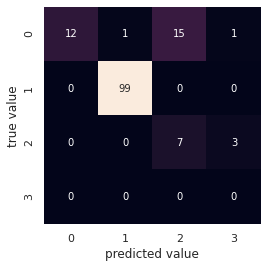

In [207]:
mat = confusion_matrix(Ytest, Y_NBModel_test)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

> `MLflow`

In [208]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    with mlflow.start_run():
        mlflow.log_metric("accuracy score", nb_test_acc)
        mlflow.log_metric("f1 score", nb_test_f1)
        mlflow.log_metric("f1_macro score", nb_test_f1_macro)
        mlflow.log_metric("f1_micro score", nb_test_f1_micro)
        mlflow.log_metric("f1_weighted score", nb_test_f1_weighted)
        mlflow.log_metric("precision score", nb_test_precision)
        mlflow.log_metric("recall score", nb_test_recall)
        mlflow.log_metric("mean squared error", nb_test_mse)
        mlflow.log_metric("mean absolute error", nb_test_mae)        

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":
            # Register the model
            mlflow.sklearn.log_model(NBmodel, "sklearn-models", registered_model_name="sklearn-naive-bayes")
        else:
            mlflow.sklearn.log_model(NBmodel, "sklearn-models")

##### `Decision Tree`

In [209]:
from sklearn import tree                     
maxFeatures = 'auto'
criterion = 'gini'
splitter = 'random'
treeModel = tree.DecisionTreeClassifier(max_features=maxFeatures, criterion=criterion, splitter=splitter)
treeModel.fit(Xtrain, Ytrain)               
YTreeModel_test = treeModel.predict(Xtest)  
YTreeModel_train = treeModel.predict(Xtrain)

In [210]:
# Trainning
tree_train_acc, tree_train_precision, tree_train_recall, tree_train_mse, tree_train_mae, tree_train_f1, tree_train_f1_macro, tree_train_f1_micro, tree_train_f1_weighted = eval_metrics(Ytrain, YTreeModel_train)

# Test
tree_test_acc, tree_test_precision, tree_test_recall, tree_test_mse, tree_test_mae, tree_test_f1, tree_test_f1_macro, tree_test_f1_micro, tree_test_f1_weighted = eval_metrics(Ytest, YTreeModel_test)

Registro de modelo

In [211]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    with mlflow.start_run():
        params = {"max_features": maxFeatures, "splitter": splitter, "criterion": criterion}

        mlflow.log_params(params)
        mlflow.log_metric("accuracy score", tree_test_acc)
        mlflow.log_metric("f1 score", tree_test_f1)
        mlflow.log_metric("f1_macro score", tree_test_f1_macro)
        mlflow.log_metric("f1_micro score", tree_test_f1_micro)
        mlflow.log_metric("f1_weighted score", tree_test_f1_weighted)
        mlflow.log_metric("precision score", tree_test_precision)
        mlflow.log_metric("recall score", tree_test_recall)
        mlflow.log_metric("mean squared error", tree_test_mse)
        mlflow.log_metric("mean absolute error", tree_test_mae)        

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":
            # Register the model
            mlflow.sklearn.log_model(treeModel, "sklearn-models", registered_model_name="sklearn-decision-tree-v1")
        else:
            mlflow.sklearn.log_model(treeModel, "sklearn-models")

**Métricas**

`Accuracy`

In [212]:
print("Accuracy TRAINING: " + str(tree_train_acc))
print("Accuracy TEST: " + str(tree_test_acc))

Accuracy TRAINING: 1.0
Accuracy TEST: 0.9782608695652174


`F1 Score`
* micro
* macro
* weighted

In [213]:
print('Type - Treino - Teste')
print('f1 score: ', tree_train_f1, tree_test_f1)
print('Macro: ', tree_train_f1_macro, tree_test_f1_macro)
print('Micro: ', tree_train_f1_micro, tree_test_f1_micro)
print('Weighted: ', tree_train_f1_weighted, tree_test_f1_weighted)

Type - Treino - Teste
f1 score:  1.0 0.99
Macro:  1.0 0.7254135338345864
Micro:  1.0 0.9782608695652174
Weighted:  1.0 0.981507028440667


`Precision` & `Recall`

In [214]:
# Training
print('Precision: ', tree_train_precision)
print('Recall: ', tree_train_recall)

Precision:  1.0
Recall:  1.0


In [215]:
# Test
print('Precision: ', tree_test_precision)
print('Recall: ', tree_test_recall)

Precision:  0.9782608695652174
Recall:  0.9782608695652174


`Error`
  * mean squared error
  * mean absolute error

In [216]:
# MSE
print('MSE: ', tree_train_mse, tree_test_mse)

MSE:  0.0 0.14744195615489714


In [217]:
# MAE
print('MAE: ', tree_train_mae, tree_test_mae)

MAE:  0.0 0.021739130434782608


`Graph tree`

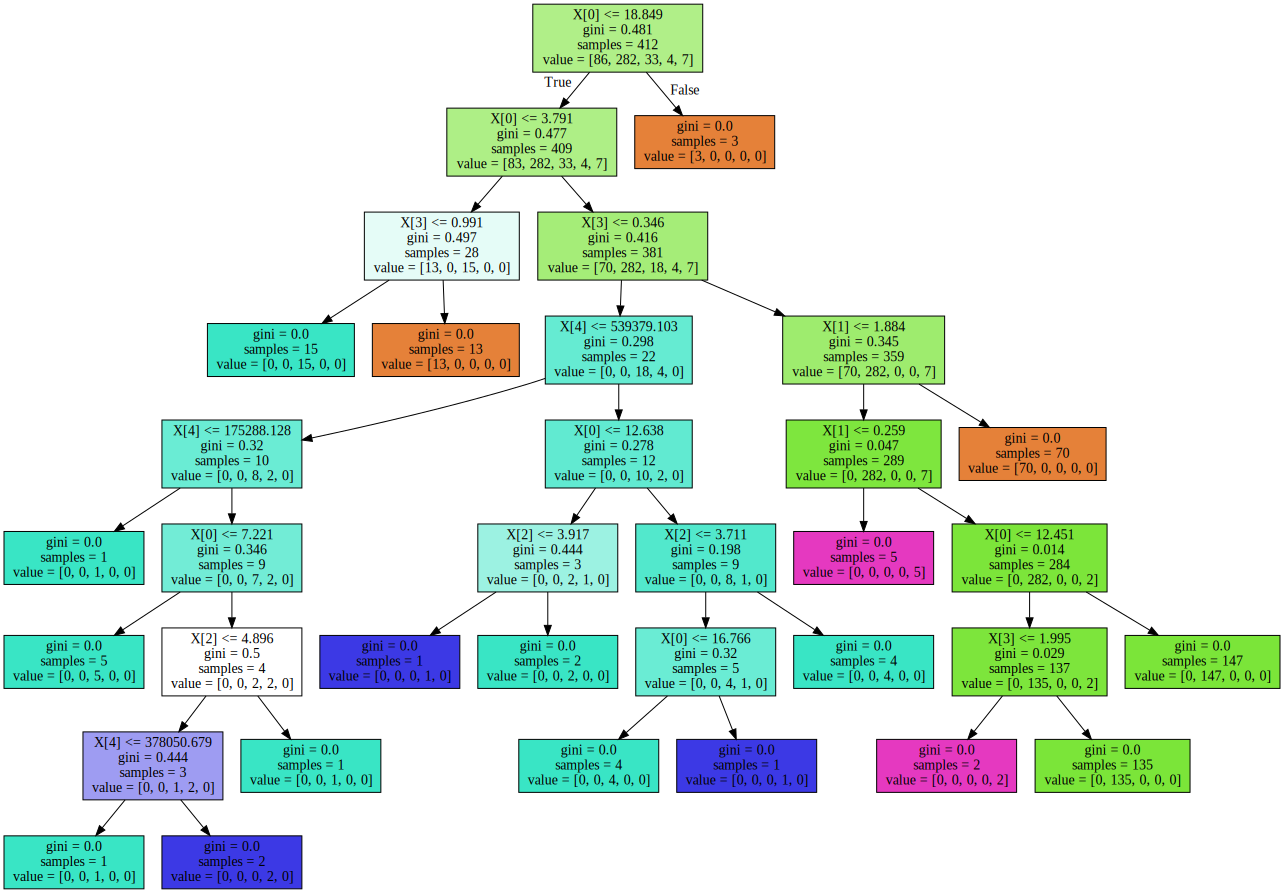

In [218]:
import graphviz 
dot_data = tree.export_graphviz(treeModel, out_file=None,filled=True) 
graph = graphviz.Source(dot_data, format="png") 
graph

##### `KNN`

> Testando o melhor valor de **K** vizinhos

In [219]:
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# varia o k de 1 a 30
k_range = range(1, 31)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xtrain, Ytrain, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9150455480458419, 0.8736996767558036, 0.8785777255362914, 0.8761387011460476, 0.8713194240376139, 0.8640905083749633, 0.8786658830443725, 0.8834557743167792, 0.8907140758154568, 0.8858947987070233, 0.888333823097267, 0.8810461357625625, 0.8858947987070233, 0.8810755215985895, 0.8810755215985895, 0.8737584484278578, 0.8713194240376139, 0.8712900382015867, 0.8712900382015867, 0.8664707610931531, 0.86650014692918, 0.8616514839847194, 0.868939171319424, 0.8689097854833969, 0.8615927123126653, 0.8591536879224213, 0.8567146635321775, 0.8664413752571261, 0.8591536879224213, 0.8567440493682046]


> Como notado, o melhor valor de K é 1.

**Configuração**

In [220]:
n_neighbors = 1 # n_neighbors -> default = 5
weights = 'uniform' # weights -> {‘uniform’, ‘distance’} 
leaf_size = 15 # leaf_size -> default = 30
KNNmodel = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, leaf_size=leaf_size)     
KNNmodel.fit(Xtrain, Ytrain)                     
Y_KNNmodel_train = KNNmodel.predict(Xtrain)          
Y_KNNmodel_test =  KNNmodel.predict(Xtest)          

**Registro de modelo**

In [221]:
# Trainning
knn_train_acc, knn_train_precision, knn_train_recall, knn_train_mse, knn_train_mae, knn_train_f1, knn_train_f1_macro, knn_train_f1_micro, knn_train_f1_weighted = eval_metrics(Ytrain, Y_KNNmodel_train)

# Test
knn_test_acc, knn_test_precision, knn_test_recall, knn_test_mse, knn_test_mae, knn_test_f1, knn_test_f1_macro, knn_test_f1_micro, knn_test_f1_weighted = eval_metrics(Ytest, Y_KNNmodel_test)

In [222]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    with mlflow.start_run():
        params = {"n_neighbors": n_neighbors, "weights": weights, "leaf_size": leaf_size}
        
        mlflow.log_params(params)
        mlflow.log_metric("accuracy score", knn_test_acc)
        mlflow.log_metric("f1 score", knn_test_f1)
        mlflow.log_metric("f1_macro score", knn_test_f1_macro)
        mlflow.log_metric("f1_micro score", knn_test_f1_micro)
        mlflow.log_metric("f1_weighted score", knn_test_f1_weighted)
        mlflow.log_metric("precision score", knn_test_precision)
        mlflow.log_metric("recall score", knn_test_recall)
        mlflow.log_metric("mean squared error", knn_test_mse)
        mlflow.log_metric("mean absolute error", knn_test_mae)        

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":
            # Register the model
            mlflow.sklearn.log_model(KNNmodel, "sklearn-models", registered_model_name="sklearn-knn-v1")
        else:
            mlflow.sklearn.log_model(KNNmodel, "sklearn-models")

> `Accuracy`

In [223]:
print( "Accuracy TRAINING: " + str(knn_train_acc) )
print( "Accuracy TEST: " + str(knn_test_acc) )

Accuracy TRAINING: 1.0
Accuracy TEST: 0.927536231884058


> `Precision` & `Recall`

In [224]:
print('Precision: ', knn_test_precision)
print('Recall: ', knn_test_recall)

Precision:  0.927536231884058
Recall:  0.927536231884058


> `F1 Score`
* micro
* macro
* weighted

In [225]:
print('Score: ', knn_test_f1)
print('Micro: ', knn_test_f1_micro)
print('Macro: ', knn_test_f1_macro)
print('Weighted: ', knn_test_f1_weighted)

Score:  0.9847715736040609
Micro:  0.927536231884058
Macro:  0.633740063212336
Weighted:  0.9331004165573568


>`Error`
  * mean squared error
  * mean absolute error

In [226]:
print('MSE: ', knn_test_mse)
print('MAE: ', knn_test_mae)

MSE:  0.5107539184552492
MAE:  0.13043478260869565


Text(0, 0.5, 'Cross-Validated Accuracy')

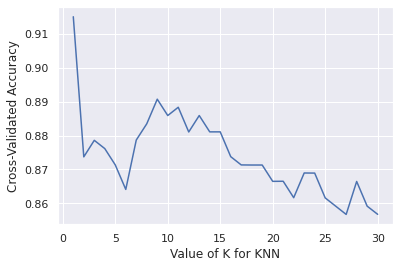

In [227]:
# plotando o valor de K versus a acurácia no cross-validation
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

##### `Random Forest`

In [228]:
from sklearn.ensemble  import RandomForestClassifier
n_estimators = 6
max_depth = 2
max_features = 'log2'
RFmodel = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)     
RFmodel.fit(Xtrain, Ytrain)                       
Y_RFmodel_train = RFmodel.predict(Xtrain)                 
Y_RFmodel_test =  RFmodel.predict(Xtest)              

**Registro de modelo**

In [229]:
# Trainning
rf_train_acc, rf_train_precision, rf_train_recall, rf_train_mse, rf_train_mae, rf_train_f1, rf_train_f1_macro, rf_train_f1_micro, rf_train_f1_weighted = eval_metrics(Ytrain, Y_RFmodel_train)

# Test
rf_test_acc, rf_test_precision, rf_test_recall, rf_test_mse, rf_test_mae, rf_test_f1, rf_test_f1_macro, rf_test_f1_micro, rf_test_f1_weighted = eval_metrics(Ytest, Y_RFmodel_test)

In [230]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    with mlflow.start_run():
        params = {"n_estimators": n_estimators, "max_depth": max_depth, "max_features": max_features}

        mlflow.log_params(params)
        mlflow.log_metric("accuracy score", tree_test_acc)
        mlflow.log_metric("f1 score", tree_test_f1)
        mlflow.log_metric("f1_macro score", tree_test_f1_macro)
        mlflow.log_metric("f1_micro score", tree_test_f1_micro)
        mlflow.log_metric("f1_weighted score", tree_test_f1_weighted)
        mlflow.log_metric("precision score", tree_test_precision)
        mlflow.log_metric("recall score", tree_test_recall)
        mlflow.log_metric("mean squared error", tree_test_mse)
        mlflow.log_metric("mean absolute error", tree_test_mae)        

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        ## Model registry does not work with file store
        if tracking_url_type_store != "file":
            # Register the model
            mlflow.sklearn.log_model(RFmodel, "sklearn-models", registered_model_name="sklearn-random-forest-v1")
        else:
            mlflow.sklearn.log_model(RFmodel, "sklearn-models")

> `Accuracy`

In [231]:
# Training
print('Training: ', rf_train_acc)
#Test
print('Test: ', rf_test_acc)

Training:  0.9878640776699029
Test:  0.9782608695652174


> `Precision` & `Recall`

In [232]:
print('Precision: ', rf_test_precision)
print('Recall: ', rf_test_recall)

Precision:  0.9782608695652174
Recall:  0.9782608695652174


> `F1 Score`
* micro
* macro
* weighted

In [233]:
print('Score: ', rf_test_f1)
print('Micro: ', rf_test_f1_micro)
print('Macro: ', rf_test_f1_macro)
print('Weighted: ', rf_test_f1_weighted)

Score:  0.99
Micro:  0.9782608695652174
Macro:  0.961578947368421
Weighted:  0.9779519450800916


>`Error`
  * mean squared error
  * mean absolute error

In [234]:
print('MSE: ', rf_test_mse)
print('MAE: ', rf_test_mae)

MSE:  0.20851441405707477
MAE:  0.028985507246376812


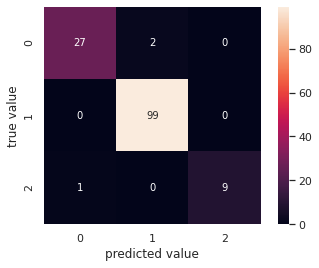

In [235]:
cm = confusion_matrix(Ytest,Y_RFmodel_test)

sns.heatmap(cm, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

#### **2ª Fase** - Estudo e Otimização de Hiperparâmetros
> Revisão, reavaliação e ajuste
>
> Ferramenta: `optuna`

- Info: https://optuna.org/

In [236]:
import optuna

# Método que avalia os objetivos
def objective(trial):
    # Validation set
    x_df = Xval
    target = Yval

    # Classificadores desejáveis
    classifier_name = trial.suggest_categorical('classifier', ['DecisionTree', 'KNN', 'RandomForest'])

    # Avaliação de modelos
    if classifier_name == 'DecisionTree':
      max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
      criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
      splitter = trial.suggest_categorical('splitter', ['best', 'random'])
      classifier_obj = tree.DecisionTreeClassifier(max_features=max_features, criterion=criterion, splitter=splitter)     
      classifier_obj.fit(x_df, target)
      predict = classifier_obj.predict(x_df)

      accuracy,_,_,_,_,_,_,_,_ = eval_metrics(target, predict)
    
    elif classifier_name == 'KNN':
      n_neighbors = trial.suggest_int('n_neighbors', 3, 99, step=3)
      weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
      leaf_size = int(trial.suggest_loguniform('leaf_size', 5, 100))
      classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, leaf_size=leaf_size)     
      classifier_obj.fit(x_df, target)
      predict = classifier_obj.predict(x_df)

      accuracy,_,_,_,_,_,_,_,_ = eval_metrics(target, predict)
    
    else:
      n_estimators = trial.suggest_int('n_estimators', 5, 100, step=10)
      max_depth = int(trial.suggest_loguniform('rf_max_depth', 2, 20))
      max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

      classifier_obj = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)
      classifier_obj.fit(x_df, target)
      predict = classifier_obj.predict(x_df)

      accuracy,_,_,_,_,_,_,_,_ = eval_metrics(target, predict)
    
    return accuracy

##### **Estudo**

In [237]:
# Cria um estudo sobre os objetos e otimiza através da função 'objective()'
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2021-04-22 22:54:59,020] A new study created in memory with name: no-name-2e04302f-fb73-44a5-abd7-bdca05638e04
[I 2021-04-22 22:54:59,034] Trial 0 finished with value: 1.0 and parameters: {'classifier': 'DecisionTree', 'max_features': 'log2', 'criterion': 'entropy', 'splitter': 'random'}. Best is trial 0 with value: 1.0.
[I 2021-04-22 22:54:59,052] Trial 1 finished with value: 1.0 and parameters: {'classifier': 'KNN', 'n_neighbors': 12, 'weights': 'distance', 'leaf_size': 7.298634604874529}. Best is trial 0 with value: 1.0.
[I 2021-04-22 22:54:59,067] Trial 2 finished with value: 1.0 and parameters: {'classifier': 'KNN', 'n_neighbors': 81, 'weights': 'distance', 'leaf_size': 34.4370696758047}. Best is trial 0 with value: 1.0.
[I 2021-04-22 22:54:59,080] Trial 3 finished with value: 1.0 and parameters: {'classifier': 'DecisionTree', 'max_features': 'auto', 'criterion': 'entropy', 'splitter': 'random'}. Best is trial 0 with value: 1.0.
[I 2021-04-22 22:54:59,099] Trial 4 finished with

`Trial = 20`
O classificador **KNN** obteve a melhor configuração e resultado entre os três classificadores, de acordo com o Optuna.
No `trial 0` é possível observar a seguinte configuração de híperparâmetros:
> `{'classifier': 'KNN', 'n_neighbors': 45, 'weights': 'uniform', 'leaf_size': 45.89565162441182}`

`Trials = 100`
O classificador **DecisionTree** obteve a melhor configuração e resultado entre os três classificadores, de acordo com o Optuna.
No `trial 0` é possível observar a seguinte configuração de híperparâmetros:
> `{'classifier': 'DecisionTree', 'max_features': 'sqrt', 'criterion': 'entropy', 'splitter': 'best'}`

`Trials = 200`
O classificador **RandomForest** obteve a melhor configuração e resultado entre os três classificadores, de acordo com o Optuna.
No `trial 0` é possível observar a seguinte configuração de híperparâmetros:
> `{'classifier': 'RandomForest', 'n_estimators': 65, 'rf_max_depth': 15.789433433054855, 'max_features': 'sqrt'}`

> **Visualização e seleção de parâmetros otimizados**

In [238]:
print(study.best_trial)

FrozenTrial(number=0, values=[1.0], datetime_start=datetime.datetime(2021, 4, 22, 22, 54, 59, 25051), datetime_complete=datetime.datetime(2021, 4, 22, 22, 54, 59, 34003), params={'classifier': 'DecisionTree', 'max_features': 'log2', 'criterion': 'entropy', 'splitter': 'random'}, distributions={'classifier': CategoricalDistribution(choices=('DecisionTree', 'KNN', 'RandomForest')), 'max_features': CategoricalDistribution(choices=('auto', 'sqrt', 'log2')), 'criterion': CategoricalDistribution(choices=('gini', 'entropy')), 'splitter': CategoricalDistribution(choices=('best', 'random'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)


**O KNN foi o melhor modelo do estudo, considerando sua eficiência em poucas iterações do otimizador do `optuna`**

##### **Otimização**

> Aplicando modificações indicadas pelo `optuna`

**Árvore de decisão**

Melhores valores estimados

*   `max_features` : 'sqrt'
*   `criterion`: 'entropy'
*   `splitter`: 'best'

In [239]:
Tunned_DecisionTreeModel = tree.DecisionTreeClassifier(max_features='sqrt', criterion='entropy', splitter='best')
Tunned_DecisionTreeModel.fit(Xtrain, Ytrain)
TunnedY_DecisionTree_test =  Tunned_DecisionTreeModel.predict(Xtest)

In [240]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Test')
print(classification_report(Ytest,TunnedY_DecisionTree_test))

Test
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        29
           1       0.98      1.00      0.99        99
           2       1.00      0.90      0.95        10

    accuracy                           0.98       138
   macro avg       0.98      0.94      0.96       138
weighted avg       0.98      0.98      0.98       138



**Resultado**
* Antes: {accuracy: `97,8%`, precision: `97,8%`, recall: `97,8%`, f1-score: `72,5%`}
* Depois: {accuracy: `98%`, precision: `98%`, recall: `94%`, f1-score: `96%`}

A otimização dos hiperparâmetros melhorou o `f1-score` com leve redução no `recall`,
mesmo assim as modificações propostas pelo optuna se mostraram estáveis com leve evolução do classificador.

**KNN**

Melhores valores estimados

*   `n_neighbors`: 45
*   `leaf_size`: 45.89565162441182
*   `weights` : 'uniform'

In [241]:
Tunned_KNNmodel = KNeighborsClassifier(n_neighbors=45, weights='uniform', leaf_size=45.89565162441182)
Tunned_KNNmodel.fit(Xtrain, Ytrain)
TunnedY_KNNmodel_test =  Tunned_KNNmodel.predict(Xtest)

In [242]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Test')
print(classification_report(Ytest,TunnedY_KNNmodel_test))

Test
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.97      1.00      0.99        99
           2       0.75      0.30      0.43        10

    accuracy                           0.92       138
   macro avg       0.83      0.72      0.74       138
weighted avg       0.91      0.92      0.91       138



**Resultado**
* Antes: {accuracy: `92,7%`, precision: `92,7%`, recall: `92,7%`, f1-score: `92,75%`}
* Depois: {accuracy: `92%`, precision: `83%`, recall: `72%`, f1-score: `74%`}

O modelo mostrou uma estabilidade na `accuracy`, porém uma redução nas outras métricas, o que nos levou a conclusão que era necessário mais tentativas do `optuna` para otimizar os hiperparâmetros deste classificador.

**Random Forest**

Melhores valores estimados

*   n_estimators: 65
*   max_depth: 15.789433433054855
*   max_features : 'sqrt'

In [243]:
Tunned_RFmodel = RandomForestClassifier(n_estimators=65, max_depth= 15.7894, max_features='sqrt')
Tunned_RFmodel.fit(Xtrain, Ytrain)
TunnedY_RFmodel_test =  Tunned_RFmodel.predict(Xtest)

In [244]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Test')
print(classification_report(Ytest,TunnedY_RFmodel_test))

Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00        10

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



**Resultado**
* Antes: {accuracy: `97,8%`, precision: `97,8%`, recall: `97,8%`, f1-score: `99%`}
* Depois: {accuracy: `100%`, precision: `100%`, recall: `100%`, f1-score: `100%`}

O modelo se mostrou mais preciso, como pode ser visto nos resultados pós-otimização de hiperparâmetros do `optuna`. Sendo a escolha do `optuna` como o melhor classificador para 200 tentativas.